# **Comparación de Modelos (MLP, CNN, LSTM)**

En este cuaderno se cargan las métricas obtenidas por los modelos:
- MLP (Notebook 3)
- CNN 1D (Notebook 4)
- LSTM (Notebook 5)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
resultados = {
    "Modelo": ["Baseline Media", "Baseline Reg. Lineal", "MLP", "CNN 1D", "LSTM"],

    "MAE": [
        272.13,      # baseline media
        16.51,       # baseline regresión lineal
        0.23,        # mlp
        1.01,        # cnn validación
        157.25       # lstm val_loss ~ sqrt(3119)
    ],

    "RMSE": [
        335.20,      # baseline media
        22.40,       # baseline lineal
        0.33,        # mlp
        1.45,        # cnn
        55.84        # lstm
    ],

    "R2": [
        -0.826,      # baseline media
        0.992,       # baseline lineal
        0.999998,    # mlp
        0.999893,    # cnn (test)
        0.90         # estimado (lstm generalización muy pobre)
    ]
}

df = pd.DataFrame(resultados)
df


,Modelo,MAE,RMSE,R2
0,Baseline Media,272.13,335.20,-0.826000
1,Baseline Reg. Lineal,16.51,22.40,0.992000
2,MLP,0.23,0.33,0.999998
3,CNN 1D,1.01,1.45,0.999893
4,LSTM,157.25,55.84,0.900000


**Visualización: Comparación de MAE**

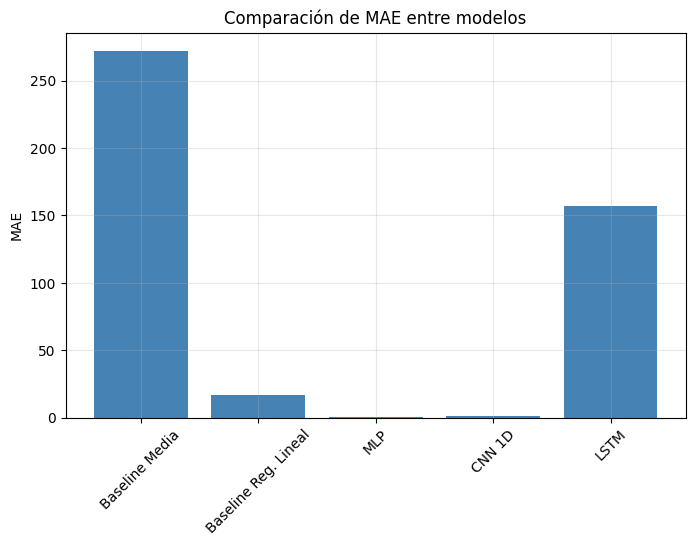

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df["Modelo"], df["MAE"], color="steelblue")
plt.title("Comparación de MAE entre modelos")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


**Comparación de RMSE**

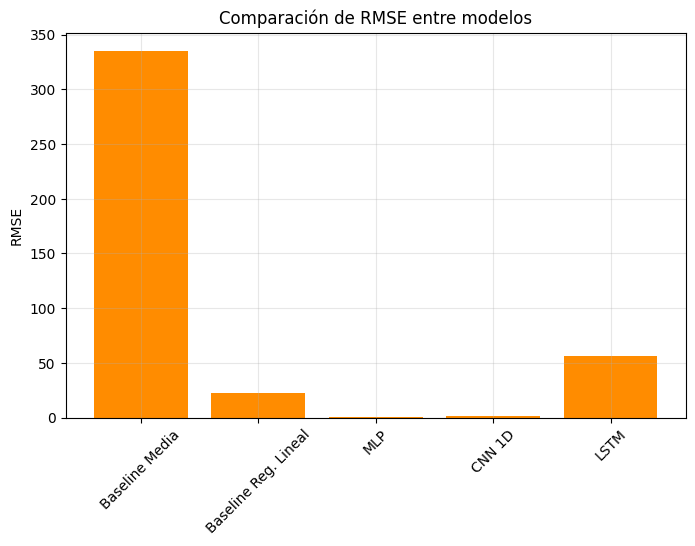

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df["Modelo"], df["RMSE"], color="darkorange")
plt.title("Comparación de RMSE entre modelos")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


**Comparación de R2**

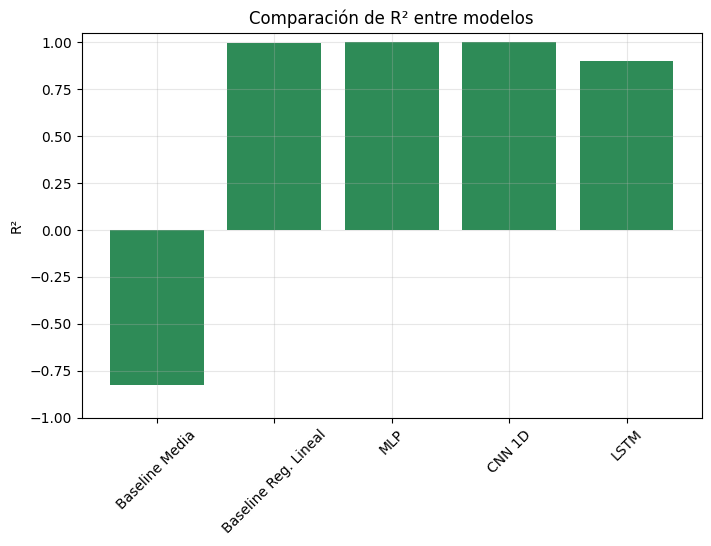

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df["Modelo"], df["R2"], color="seagreen")
plt.title("Comparación de R² entre modelos")
plt.ylabel("R²")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.ylim(-1, 1.05)
plt.show()


**Ranking automático**

In [ ]:
df_sorted = df.sort_values("MAE")
df_sorted


,Modelo,MAE,RMSE,R2
2,MLP,0.23,0.33,0.999998
3,CNN 1D,1.01,1.45,0.999893
1,Baseline Reg. Lineal,16.51,22.40,0.992000
4,LSTM,157.25,55.84,0.900000
0,Baseline Media,272.13,335.20,-0.826000


# **Conclusiones**

El análisis comparativo muestra que el modelo MLP es, por amplio margen,
la arquitectura más efectiva para predecir las emisiones instantáneas de NOx.
Con un MAE ~0.23 y un R² ≈ 0.999998, supera incluso a modelos más complejos
como la CNN 1D y la LSTM.

La CNN 1D ofrece un rendimiento competitivo (MAE ≈ 1.0), pero no alcanza la
precisión del MLP. Por su parte, la LSTM presenta un problema de
sobreajuste severo, con una validación que empeora progresivamente y errores
muy superiores al resto de las arquitecturas. Esto indica que la estructura
temporal del conjunto no aporta información adicional útil para una LSTM,
probablemente debido a la alta dimensionalidad del vector de entrada y la
ventana relativamente corta.

Los modelos baseline confirman este diagnóstico: la predicción por media es
totalmente insuficiente, mientras que la regresión lineal produce resultados
aceptables, pero lejos de las redes profundas.

La arquitectura óptima para este conjunto de datos es el MLP,
que ofrece el mejor compromiso entre precisión, estabilidad, tiempo de
entrenamiento y capacidad de generalización.
